# TZ Gaming: Optimal Targeting of Mobile Ads

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 200

In [2]:
# if your pyrsm version is not 1.1.0 install in a
# terminal using: pip install --user pyrsm --upgrade
rsm.__version__

'1.3.0'

In [3]:
# loading data tz_gaming.parquet
tz_gaming = pd.read_parquet("data/tz_gaming.parquet")
tz_gaming.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/tz_gaming.parquet'

In [ ]:
# dataset description
tz_gaming_description = rsm.md("data/tz_gaming_description.md")

### TZ Gaming: Optimal Targeting of Mobile Ads

Each row in the `tz_gaming` dataset represents an impression. For each row (impression), we have data on 21 variables. All explanatory variables are created by Vneta based on one month tracking history of users, apps, and ads. The available variables are described in below. 

* _training_ -- Dummy variable that splits the dataset into a training ("train") and a test ("test") set
* _inum_ -- Impression number
* _click_ -- Click indicator for the TZ ad served in the impression. Equals "yes" if the ad was clicked and "no" otherwise
* _time_ -- The hour of the day in which the impression occurred (1-24). For example, "2" indicates the impression occurred between 1 am and 2 am
* _time\_fct_ -- Same as _time_ but the is coded as categorical 
* _app_ -- The app in which the impression was shown. Ranges from 1 to 49
* _mobile\_os_ -- Customer's mobile OS
* _impup_ -- Number of past impressions the user has seen in the app
* _clup_ -- Number of past impressions the user has clicked on in the app
* _ctrup_ -- Past CTR (Click-Through Rate) (x 100) for the user in the app
* _impua_ -- Number of past impressions of the TZ ad that the user has seen across all apps
* _clua_ -- Number of past impressions of the TZ ad that the user has clicked on across all apps
* _ctrua_ -- Past CTR (x 100) of the TZ ad by the user across all apps
* _imput_ -- Number of past impressions the user has seen within in the hour
* _clut_ -- Number of past impressions the user has clicked on in the hour
* _ctrut_ -- Past CTR (x 100) of the user in the hour
* _imppat_ -- Number of past impressions that showed the TZ ad in the app in the hour
* _clpat_ -- Number of past clicks the TZ ad has received in the app in the hour
* _ctrpat_ -- Past CTR (x 100) of the TZ ad in the app in the hour
* _rnd_ -- Simulated data from a normal distribution with mean 0 and a standard deviation of 1
* _pred\_vneta_ -- Predicted probability of click per impressions generated by Vneta's proprietary machine learning algorithm
* id -- Anonymized user ID

Note that there is a clear relationship between the impressions, clicks, and ctr variables within a strata. Specifically: 

* ctrup = clup/impup
* ctru = clu/impu
* ctrut = clut/imput
* ctrpat = clpat/impat

The last three letters of a feature indicate the sources of variation in a variable:

* u — denotes user
* t — denotes time
* p — denotes app
* a — denotes ad 



> Note: Review the data description carefully and watch the "Video: TZ gaming preview (12 min)" linked on Canvas

> Note: Full case and question details are contained in the tz-gaming-msba.pdf file


## Part I: Logistic regression (10 points)

> Note: For the following questions, use only the "training" sample of impressions (i.e., 87,535 rows where "training == 'train'").

In [ ]:
tz_gaming_train = tz_gaming[tz_gaming['training'] == 'train'].copy()
print(tz_gaming_train.shape[0])
tz_gaming_train.head()

87535


,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrua,imput,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0.000000,25,0,0.000000,71,1,1.408451,-1.207066,0.003961,id247135
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0.000000,7,0,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,6.578947,94,0,0.000000,331,1,0.302115,1.084441,0.003961,id927245
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0.000000,19,0,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,0.689655,329,4,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833


a. Estimate a logistic regression model using `click` as the response variable (target) and the following as explanatory variables (features). The model should predict the probability that `click` is equal to "yes" (2 points):

`time_fct, app, mobile_os, impua, clua, ctrua`

In [ ]:
clf = rsm.model.logistic(
    data=tz_gaming_train,
    rvar="click",
    lev="yes",
    evar=[
        "time_fct",
        "app",
        "mobile_os",
        "impua",
        "clua",
        "ctrua",
    ],
)
clf.summary()

Logistic regression (GLM)
Data                 : Not provided
Response variable    : click
Level                : yes
Explanatory variables: time_fct, app, mobile_os, impua, clua, ctrua
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                     OR      OR%  coefficient   std.error  z.value p.value     
Intercept         0.029   -97.1%        -3.53       0.197  -17.936  < .001  ***
time_fct[2]       0.622   -37.8%        -0.47       0.321   -1.478   0.139     
time_fct[3]       0.718   -28.2%        -0.33       0.454   -0.730   0.466     
time_fct[4]       0.000  -100.0%       -23.54   42007.161   -0.001     1.0     
time_fct[5]       0.000  -100.0%       -23.72   55229.970   -0.000     1.0     
time_fct[6]       0.349   -65.1%        -1.05       1.021   -1.030   0.303     
time_fct[7]       1.221    22.1%         0.20       0.426    0.468    0.64     
time_fct[8]       1.104    10.4%         0.10       0.296    0.335   0.737     
time_

b. Summarize and interpret the logistic regression results. Which of these explanatory variables are statistically significant? Which variables are most important? Make sure your model evaluation includes (1) an interpretation of the Permutation importance and Prediction plots for the explanatory variables `mobile_os`, `impua`, `clua`, and `ctrua` and (2) an evaluation of the model as a whole using Pseudo R-squared and the Chi-square test (5 points).

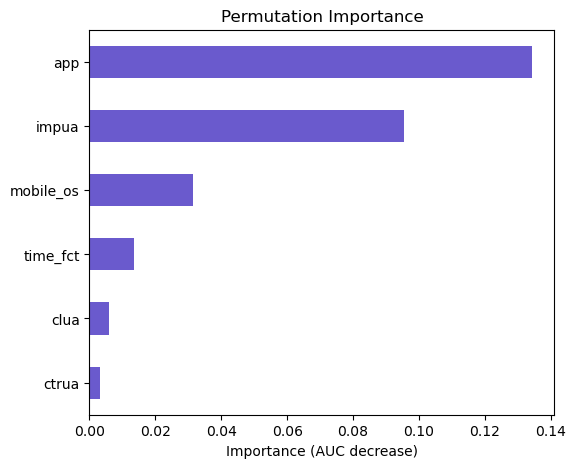

In [ ]:
# discuss and add code to calculate additional statistics as needed
clf.plot("vimp")

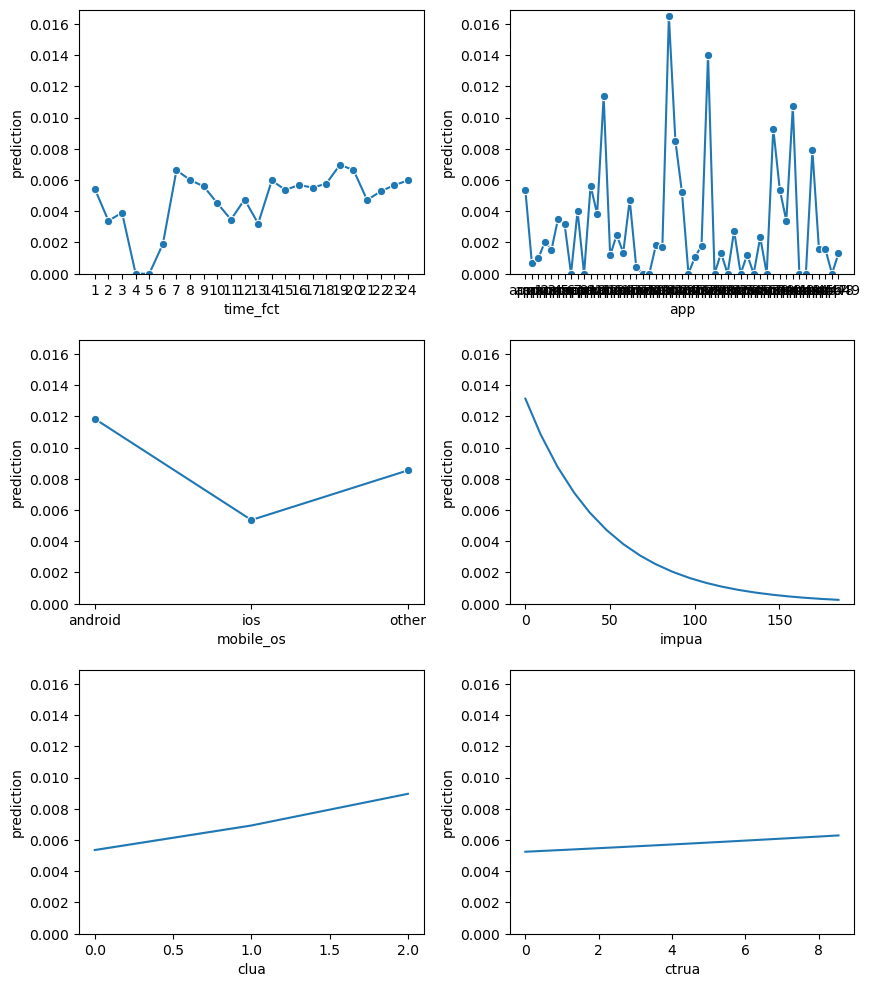

In [ ]:
clf.plot("pred")

In [ ]:
clf.summary(main=False, fit=True)


Pseudo R-squared (McFadden): 0.109
Pseudo R-squared (McFadden adjusted): 0.092
Area under the RO Curve (AUC): 0.792
Log-likelihood: -3946.072, AIC: 8046.145, BIC: 8768.389
Chi-squared: 968.279, df(76), p.value < 0.001 
Nr obs: 87,535


1. Which of these explanatory variables are statistically significant?

mobile_os, impua, clua, ctrua, app2, app4, app13, app14, app18, etc.

2. (1) Which variables are most important?

The most influential variable is `app`, with a significant drop in performance when shuffled and is critical for predicting clicks.

The second most important is `impua`, indicating that user activity at the impression level plays a key role in driving clicks. Higher impua values correspond to lower click probabilities. This may indicate diminishing returns for users exposed to frequent ads.

`mobile_os` is moderately important, with iOS users being 55% less likely to click compared to Android users. Android users have the highest predicted click probability, followed by “Other” OS users, while iOS users have significantly lower probabilities. This suggests iOS users are less likely to engage with ads.

`clua` and `ctrua` are less important compared to app and impua, but still play meaningful roles in predicting clicks. Higher clua values increase click probabilities, suggesting users who have higher levels of engagement with clicks are more likely to click again. As ctrua increases, click probability increases slightly, reflecting the impact of a higher click-through rate at the ad level.


2. (2) an evaluation of the model as a whole using Pseudo R-squared and the Chi-square test

•	Pseudo R-squared: 0.109, suggests the model explains ~10.9% of the variance in click probability. This is moderate and typical for logistic regression in large datasets.

•	Chi-squared Test: 968.279 (p-value < 0.001) indicates the model as a whole is statistically significant. At least one variable contributes meaningfully to predicting clicks.

c. Predict the probability of a click (2 points)

The estimated logistic regression model can predict the probability of `click == "yes"`. Create a new variable `pred_logit` with the predicted click probabilities for each impression. Make sure to generate predictions for all rows in both the training and test data.

In [ ]:
# target the dataset I want to predict
tz_gaming["pred_logit"] = clf.predict(tz_gaming)["prediction"]
tz_gaming["pred_logit"]

0         3.382977e-13
1         1.156355e-02
2         2.655311e-03
3         1.349420e-02
4         1.868222e-03
              ...     
115483    1.093091e-03
115484    3.609483e-03
115485    2.052670e-02
115486    2.192207e-02
115487    1.170346e-02
Name: pred_logit, Length: 115488, dtype: float64

d. Estimate a logistic regression with `click` as the response variable and `rnd` as the **only** explanatory variable. As before, the model should be estimated on the training sample (i.e., "training == 'train'"). Create a new variable `pred_rnd` with the predicted click-through probabilities (1 point).

In [ ]:
clf_rnd = rsm.model.logistic(data=tz_gaming_train,rvar="click",lev="yes",evar="rnd",)
clf_rnd.summary()

Logistic regression (GLM)
Data                 : Not provided
Response variable    : click
Level                : yes
Explanatory variables: rnd
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.009  -99.1%        -4.72      0.036 -130.657  < .001  ***
rnd        0.965   -3.5%        -0.04      0.036   -0.986   0.324     

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.0
Pseudo R-squared (McFadden adjusted): -0.0
Area under the RO Curve (AUC): 0.513
Log-likelihood: -4429.726, AIC: 8863.451, BIC: 8882.211
Chi-squared: 0.972, df(1), p.value 0.324 
Nr obs: 87,535


In [ ]:
tz_gaming["pred_rnd"] = clf_rnd.predict(tz_gaming)["prediction"]
tz_gaming["pred_rnd"].head()

0    0.009222
1    0.008751
2    0.008505
3    0.009600
4    0.008704
Name: pred_rnd, dtype: float64

In [ ]:
tz_gaming.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0,0.000000,71,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13,0.009222
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02,0.008751
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,0,0.000000,331,1,0.302115,1.084441,0.003961,id927245,2.655311e-03,0.008505
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02,0.009600
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,4,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03,0.008704


## Part II: Understanding Multicollinearity and Omitted Variable Bias (10 points)

a. Estimate a logistic regression model with `click` as the response variable and `imppat`, `clpat`, and `ctrpat` as the only explanatory variables. What is the interpretation of the Prediction plots for the explanatory variables? (2 points)

> Note: Make sure to watch the "Video: TZ gaming preview (12 min)" on Canvas before answering this questions so you fully understand what the variables represent

In [ ]:
clf_mc1 = rsm.model.logistic(
    data=tz_gaming_train,
    rvar="click",
    lev="yes",
    evar=[
        "imppat",
        "clpat",
        "ctrpat",
    ],
)
clf_mc1.summary(main=False, fit=False, vif=True)

Logistic regression (GLM)
Data                 : Not provided
Response variable    : click
Level                : yes
Explanatory variables: imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.42      0.073  -74.156  < .001  ***
imppat     1.000   -0.0%        -0.00      0.000   -4.802  < .001  ***
clpat      1.002    0.2%         0.00      0.000    5.713  < .001  ***
ctrpat     1.615   61.5%         0.48      0.034   13.933  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.035
Pseudo R-squared (McFadden adjusted): 0.035
Area under the RO Curve (AUC): 0.676
Log-likelihood: -4273.088, AIC: 8554.176, BIC: 8591.695
Chi-squared: 314.248, df(3), p.value < 0.001 
Nr obs: 87,535


In [ ]:
cr = rsm.basic.correlation(
    tz_gaming[["imppat", "clpat", "ctrpat", "click"]]
)
cr.plot()

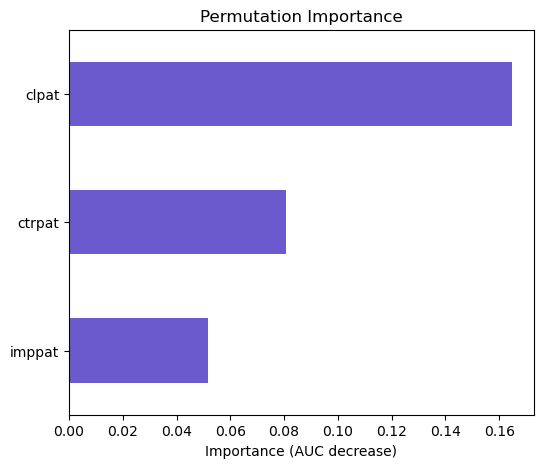

In [ ]:
clf_mc1.plot("vimp")

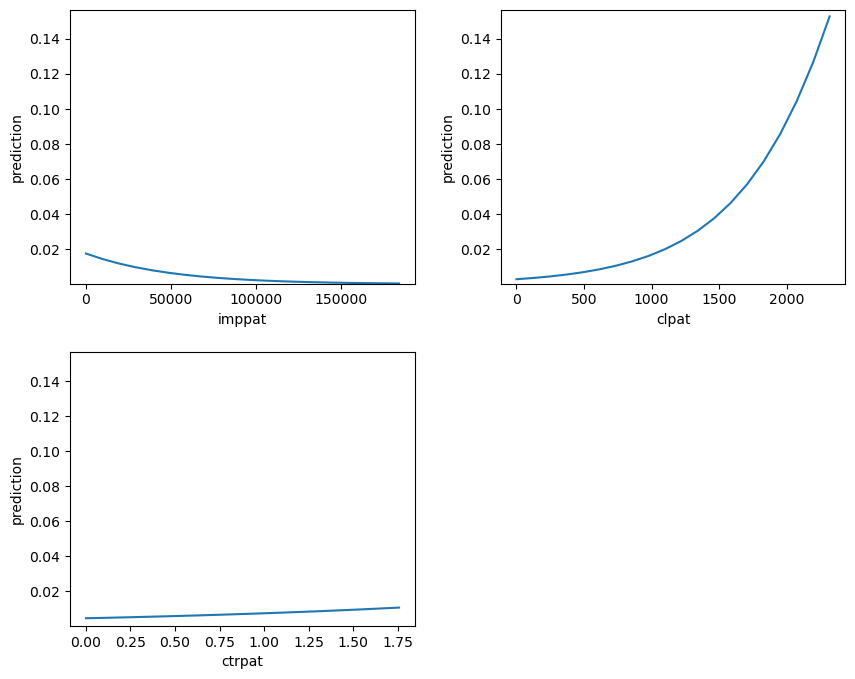

In [ ]:
clf_mc1.plot("pred")

Pseudo R-squared (0.035) suggests low explanatory power, meaning these three variables alone are not strong predictors of clicks, but Chi-Square Test (p < 0.001) is statistically significant, meaning at least one variable meaningfully impacts click probability.

As imppat increases, the predicted probability of a click decreases. High impression counts may lead to ad fatigue, reducing engagement.

clpat increases exponentially with higher clpat. Users who frequently click ads are much more likely to continue engaging.

Higher ctrpat leads to a small increase in click probability. Ads with historically high CTRs tend to maintain better engagement.

b. Some of the variables in the dataset are highly correlated with each other. In particular, `imppat` and `clpat` have a very high positive correlation of 0.97. Discuss the implications of this (very) high level of collinearity and also different approaches to deal with it. What are the implications for the model and the interpretation of the Prediction plots? As part of your answer, discuss the change in the Prediction plot for `imppat` when you remove `clpat` from the model you estimated for II.a (4 points).

In [ ]:
tz_gaming_train[["imppat", "clpat", "ctrpat"]].corr()

,imppat,clpat,ctrpat
imppat,1.000000,0.971579,0.344099
clpat,0.971579,1.000000,0.460035
ctrpat,0.344099,0.460035,1.000000


> Note: Assign your new model without `clpat` to a new object `clf_mc2`. Calculate VIF statistics for each explanatory variable in the model

In [ ]:
clf_mc2 = rsm.model.logistic(
    data=tz_gaming_train,
    rvar="click",
    lev="yes",
    evar=[
        "imppat",
        "ctrpat",
    ],
)
clf_mc2.summary(vif=True)

Logistic regression (GLM)
Data                 : Not provided
Response variable    : click
Level                : yes
Explanatory variables: imppat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.53      0.068  -80.814  < .001  ***
imppat     1.000    0.0%         0.00      0.000    5.460  < .001  ***
ctrpat     1.733   73.3%         0.55      0.030   18.422  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.031
Pseudo R-squared (McFadden adjusted): 0.031
Area under the RO Curve (AUC): 0.674
Log-likelihood: -4290.903, AIC: 8587.805, BIC: 8615.945
Chi-squared: 278.619, df(2), p.value < 0.001 
Nr obs: 87,535

Variance inflation factors:

          vif    Rsq
imppat  1.134  0.118
ctrpat  1.134  0.118


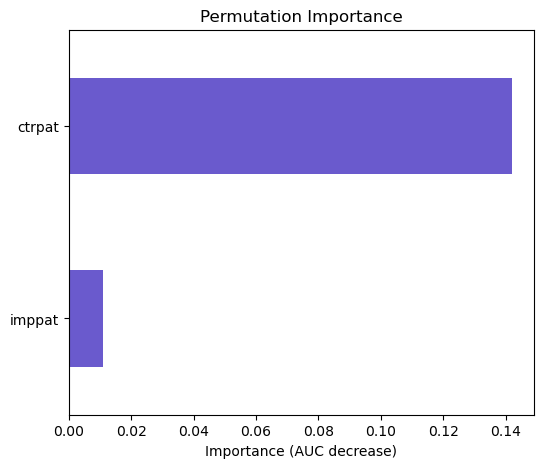

In [ ]:
clf_mc2.plot("vimp")

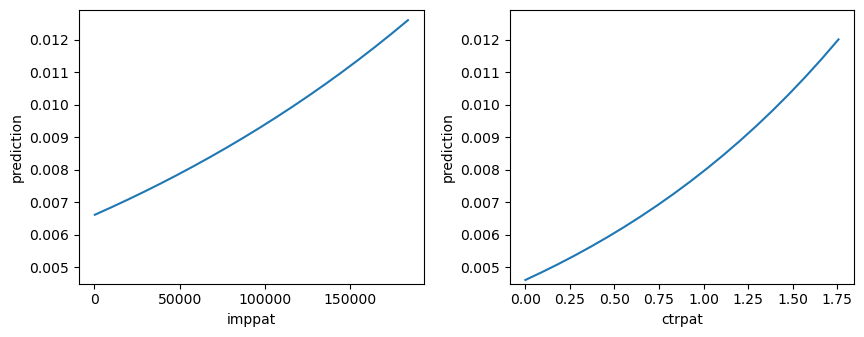

In [ ]:
clf_mc2.plot("pred")

1. Discuss the implications of this (very) high level of collinearity and also different approaches to deal with it. 

High collinearity (0.97) between imppat and clpat makes it difficult to separate their individual effects, inflating std and leading to unreliable coefficient estimates. 

To address this, one approach is to remove one of the correlated variables, another is to combine them using PCA or transformations, and regularization techniques like Lasso can also be applied to reduce collinearity. Checking Variance Inflation Factor (VIF) helps assess the severity of collinearity and decide which variable to keep.

2. What are the implications for the model and the interpretation of the Prediction plots?

Keeping clpat prioritizes prediction accuracy over interpretability. The model relies heavily on click behavior patterns, making clpat essential for performance. imppat’s true effect may be masked, leading to potential misinterpretation of impression frequency’s impact.

3. As part of your answer, discuss the change in the Prediction plot for `imppat` when you remove `clpat` from the model you estimated for II.a

When clpat is included, imppat has a weak or slightly negative effect on click probability. Before removing clpat shows a declining probability of clicks as imppat increases. This happens because clpat and imppat are highly correlated (0.97), making it difficult to separate their individual contributions.

c. Estimate another logistic regression model with `click` as the response variable and `time_fct`, `app`, `imppat`, `clpat`, and `ctrpat` as the explanatory variable. Why are the Prediction plots for `imppat`, `clpat`, and `ctrpat` different compared to the plots from the model you estimated in II.a? Please be specific and investigate beyond simply stating the statistical problem (4 points).

> Note: You may want to test if a (set of) coefficients are equal to 0 (or Odds-ratios are equal to 1)

In [ ]:
clf_mc3 = rsm.model.logistic(
    data=tz_gaming_train,
    rvar="click",
    lev="yes",
    evar=[
        "time_fct",
        "app",
        "imppat",
        "clpat",
        "ctrpat",
    ],
)
clf_mc3.summary()

Logistic regression (GLM)
Data                 : Not provided
Response variable    : click
Level                : yes
Explanatory variables: time_fct, app, imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                 OR      OR%  coefficient   std.error  z.value p.value     
Intercept     0.012   -98.8%        -4.42       0.284  -15.575  < .001  ***
time_fct[2]   0.588   -41.2%        -0.53       0.323   -1.644     0.1     
time_fct[3]   0.693   -30.7%        -0.37       0.461   -0.795   0.426     
time_fct[4]   0.000  -100.0%       -23.83   43904.903   -0.001     1.0     
time_fct[5]   0.000  -100.0%       -23.86   57249.164   -0.000     1.0     
time_fct[6]   0.359   -64.1%        -1.03       1.027   -0.999   0.318     
time_fct[7]   1.220    22.0%         0.20       0.438    0.453    0.65     
time_fct[8]   1.135    13.5%         0.13       0.309    0.411   0.681     
time_fct[9]   1.063     6.3%         0.06       0

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


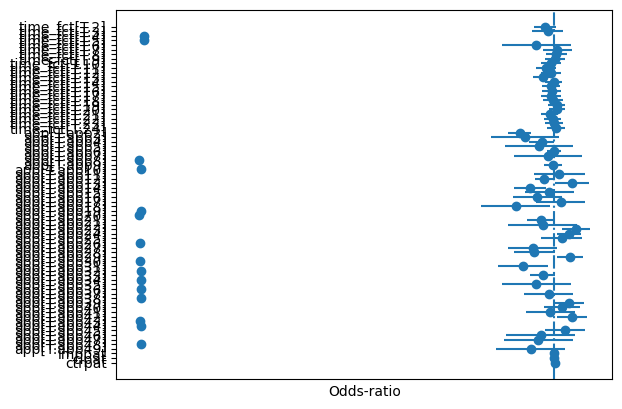

In [ ]:
clf_mc3.plot("or")

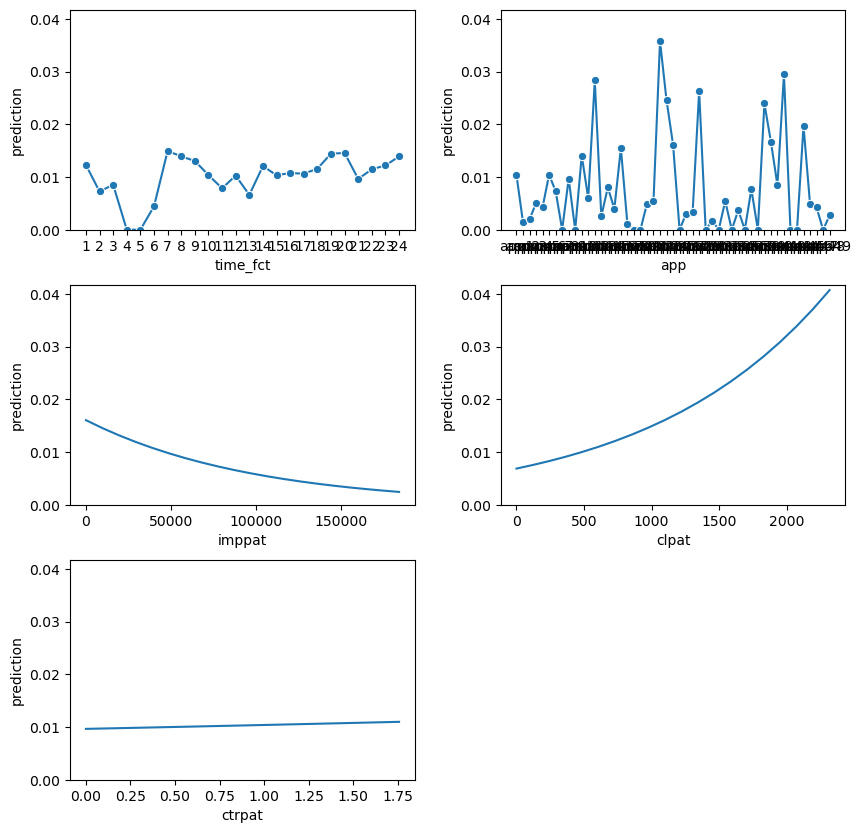

In [ ]:
clf_mc3.plot("pred")

1.	time_fct and app absorb variance, reducing the direct impact of imppat, clpat, and ctrpat.

2.	Multicollinearity weakens effects—imppat and clpat (0.97 correlation) lose independent influence.

3.	Prediction Plot Changes:
	•	imppat: Less negative effect.
	•	clpat: Still positive but less steep.
	•	ctrpat: Slightly stronger effect.

4.	Odds Ratios ≈ 1 and high p-values confirm insignificance in the new model.

Conclusion

Adding time_fct and app is better for improving predictive power and handling collinearity. However, it reduces interpretability of imppat, clpat, and ctrpat.

Recommendation:

Keep time_fct and app, but consider removing insignificant categories or using regularization (Lasso) to reduce noise.

## Part III: Decile Analysis of Logistic Regression Results (5 points)

> Note: For the following questions, use only the "test" sample of impressions (i.e., 27,953 rows where "training == 'test'")


In [ ]:
tz_gaming_test = tz_gaming[tz_gaming['training'] == 'test'].copy()
print(tz_gaming_test.shape[0])
tz_gaming_test.head()

27953


,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd
87535,test,I300002,no,21,21,app1,android,1458,3,0.205761,...,0,0.000000,68113,957,1.405018,0.147891,0.003961,id466983,1.020981e-02,0.008791
87536,test,I300006,no,3,3,app40,ios,3,0,0.000000,...,0,0.000000,50,0,0.000000,0.383246,0.018965,id946375,8.665095e-03,0.008718
87537,test,I300012,no,5,5,app12,android,5057,6,0.118647,...,0,0.000000,754,8,1.061008,1.274485,0.003961,id479295,1.910723e-14,0.008448
87538,test,I300015,no,10,10,app1,android,1993,10,0.501756,...,0,0.000000,26537,276,1.040057,0.673022,0.003961,id83284,6.240407e-03,0.008630
87539,test,I300016,no,14,14,app1,ios,212,7,3.301887,...,1,5.263158,57348,874,1.524029,-0.785851,0.050679,id359434,1.233449e-02,0.009086


a. Assign each impression to a decile based on the predicted probability of a click (`pred_logit`) based on the model estimated in I.a. Create a new variable `pred_logit_dec` that captures this information. Note: The first decile should have the highest average click rate. If not, make sure to "reverse" the decile numbers (i.e., 10 becomes 1, 9 becomes 2, etc.). Use the `xtile` function from the `pyrsm` package to create the deciles (2 points)

In [ ]:
# Ensure pred_logit column is in tz_gaming_test and fill missing values with 0
tz_gaming["pred_logit"] = tz_gaming["pred_logit"].fillna(0)

# Use the `xtile` function from the `pyrsm` package to create the deciles
tz_gaming["pred_logit_dec"] = rsm.xtile(tz_gaming["pred_logit"], 10)

# Step 3: Explicitly map 'click' column to numeric values
tz_gaming["click_numeric"] = tz_gaming["click"].map({"no": 0, "yes": 1}).astype(float)

# Reverse decile numbers if Decile 1 does not have the highest click rate
if tz_gaming.groupby("pred_logit_dec")["click_numeric"].mean().idxmax() != 1:  # Check if Decile 1 has the highest click rate
    tz_gaming["pred_logit_dec"] = 11 - tz_gaming["pred_logit_dec"]

# Validate the decile assignment
tz_gaming.groupby("pred_logit_dec")[["pred_logit", "click_numeric"]].mean()

,pred_logit,click_numeric
pred_logit_dec,,
1,0.034302,0.037345
2,0.017118,0.015071
3,0.011947,0.012802
4,0.008998,0.008833
5,0.006607,0.005716
6,0.004402,0.004242
7,0.002679,0.002858
8,0.001471,0.001126
9,0.000699,0.001212


In [ ]:
tz_gaming.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,pred_logit_dec,click_numeric
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,71,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13,0.009222,10,0.0
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,67312,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02,0.008751,3,0.0
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,331,1,0.302115,1.084441,0.003961,id927245,2.655311e-03,0.008505,7,0.0
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,71114,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02,0.009600,3,0.0
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,183852,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03,0.008704,8,0.0


b. Report the number of impressions (rows), the number of clicks (`click`), and the click through rate (`ctr`) (i.e., sum of clicks divided by number of impressions) for the TZ ad per decile and save this information to a new dataframe called `dec_tab` (2 points)

In [ ]:
# your data frame should have columns called 'nr_impressions', 'nr_clicks', and 'ctr'
# to calculate these values you need deciles, the number of rows (impressions)
# in each decile, the number of clicks in each decile using the `click` variable,
# and the ratio of clicks to impressions (ctr)
# Group data by deciles and calculate the required metrics
dec_tab = tz_gaming.groupby("pred_logit_dec").agg(
    nr_impressions=("click_numeric", "count"),  # Total number of rows in each decile
    nr_clicks=("click_numeric", "sum"),        # Sum of clicks (1 = click, 0 = no click)
)

# Calculate click-through rate (CTR)
dec_tab["ctr"] = dec_tab["nr_clicks"] / dec_tab["nr_impressions"]

# Reset index for better readability
dec_tab = dec_tab.reset_index()

dec_tab

,pred_logit_dec,nr_impressions,nr_clicks,ctr
0,1,11541,431.0,0.037345
1,2,11545,174.0,0.015071
2,3,11561,148.0,0.012802
3,4,11548,102.0,0.008833
4,5,11547,66.0,0.005716
5,6,11551,49.0,0.004242
6,7,11547,33.0,0.002858
7,8,11549,13.0,0.001126
8,9,11549,14.0,0.001212
9,10,11550,15.0,0.001299


c. Create a bar chart of click-through rates per decile (i.e., use `pred_logit_dec` as the x-variable and `ctr` as the y-variable). Note that the "click-through rate" is not the same as the "predicted probability of click." The click-through rate captures the proportion of impressions in a given group (e.g., in a decile) that actually resulted in a click (1 point)

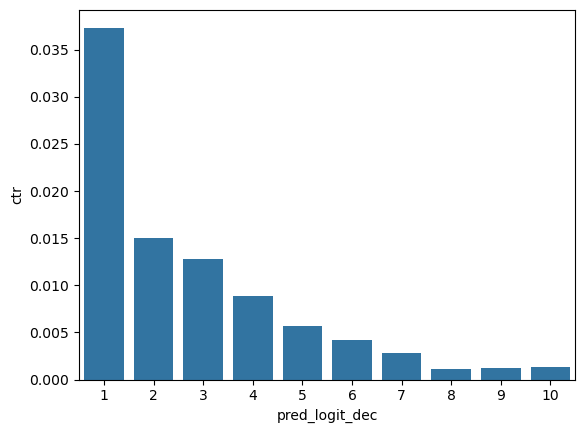

In [ ]:
fig = sns.barplot(x="pred_logit_dec", y="ctr", data=dec_tab)

## Part IV: Gains Curves (15 points)

Use the `dec_tab` DataFrame you created in Part III for the following calculations.

a. Write python code to generate a table with the cumulative proportion of impressions and the cumulative gains for each decile (8 points)

> Note: Do NOT use any specialized python packages to construct the gains table. Write the python code from scratch. Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

In [ ]:
dec_tab["cum_prop_impressions"] = dec_tab["nr_impressions"].cumsum() / dec_tab["nr_impressions"].sum()

dec_tab["cum_gains"] = dec_tab["nr_clicks"].cumsum() / dec_tab["nr_clicks"].sum()
dec_tab

,pred_logit_dec,nr_impressions,nr_clicks,ctr,cum_prop_impressions,cum_gains
0,1,11541,431.0,0.037345,0.099932,0.412440
1,2,11545,174.0,0.015071,0.199900,0.578947
2,3,11561,148.0,0.012802,0.300005,0.720574
3,4,11548,102.0,0.008833,0.399998,0.818182
4,5,11547,66.0,0.005716,0.499983,0.881340
5,6,11551,49.0,0.004242,0.600002,0.928230
6,7,11547,33.0,0.002858,0.699986,0.959809
7,8,11549,13.0,0.001126,0.799988,0.972249
8,9,11549,14.0,0.001212,0.899990,0.985646
9,10,11550,15.0,0.001299,1.000000,1.000000


b. Use `seaborn`, `matplotlib`, or `pandas` to create a chart showing the cumulative gains per decile along with a (diagonal) reference line to represent the "no model" scenario. Put cumulative gains on the Y-axis and cumulative proportion of impressions on the X-axis (7 points)

> Note: Do NOT use any specialized packages to construct the gains chart. Write the python code from scratch. Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains chart. Be prepared to discuss the code you submit for this question in class if called upon

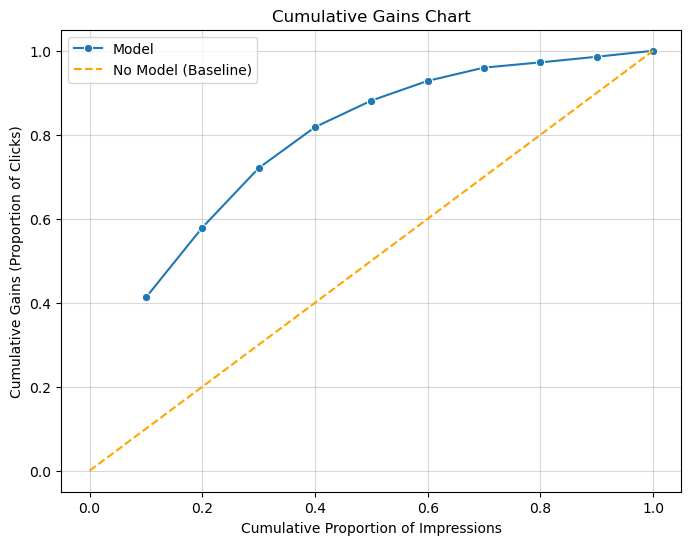

In [ ]:
# Plot cumulative gains
plt.figure(figsize=(8, 6))
sns.lineplot(
    x=dec_tab["cum_prop_impressions"],
    y=dec_tab["cum_gains"],
    marker="o",
    label="Model"
)

# Plot the "no model" reference line
plt.plot([0, 1], [0, 1], linestyle="--", color="orange", label="No Model (Baseline)")

# Add labels, title, and legend
plt.xlabel("Cumulative Proportion of Impressions")
plt.ylabel("Cumulative Gains (Proportion of Clicks)")
plt.title("Cumulative Gains Chart")
plt.legend()

# Show grid for better readability
plt.grid(alpha=0.5)

# Display the plot
plt.show()

In [ ]:
profit_tab = pd.DataFrame({"cum_prop": [0] * 10, "cum_profit": [0] * 10})

In [ ]:
gains_tab = pd.DataFrame({"cum_prop": [0] * 10, "cum_gains": [0] * 10})

## Part V: Confusion matrix (10 points)

a. Create a "confusion matrix" based on the predictions from the logistic regression model you estimated in Part I.a (i.e., the model used to generate `pred_logit`). Again, use **only** data from the test set here (i.e., "training == 'test'"). Use the financial assumptions mentioned above, and repeated in section VI below, to determine an appropriate cut-off (i.e., breakeven). Calculate "accuracy" based on the confusion matrix you created (2 points)

> Note: Do NOT use any specialized packages to construct the confusion matrix. Code the matrix from scratch.  Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the confusion matrix. Be prepared to discuss the code you submit for this question in class if called upon

> Note use the code format below to store the relevant values from your confusion matrix

The assumptions used for the analysis are as follows:

• Targeting of impressions to consumers covered by the Vneta ad-network to date has been (approximately) random

• Cost per 1,000 video impressions (CPM) is $10

• Conversion to sign-up as a TZ game player after clicking on an ad is 5%

• The expected CLV of customers that sign-up with TZ after clicking on an ad is approximately $25

• The price charged for the data by Vneta is $50K

• The price charged for the data science consulting services by Vneta is $150K

In [ ]:
# Financial assumptions
cpm = 10  # Cost per 1,000 impressions in dollars
conversion_rate = 0.05  # Conversion rate (5% of clicks result in sign-ups)
clv = 25  # Customer lifetime value in dollars

# Calculate breakeven threshold
threshold = cpm / 1000 / (conversion_rate * clv)

# Ensure pred_logit column is in tz_gaming_test
tz_gaming_test["pred_logit"] = tz_gaming[tz_gaming["training"] == "test"]["pred_logit"]

# Calculate predicted clicks based on the threshold
tz_gaming_test["predicted_click"] = (tz_gaming_test["pred_logit"] >= threshold).astype(int)

TP = ((tz_gaming_test["predicted_click"] == 1) & (tz_gaming_test["click"] == "yes")).sum()
FP = ((tz_gaming_test["predicted_click"] == 1) & (tz_gaming_test["click"] == "no")).sum()
TN = ((tz_gaming_test["predicted_click"] == 0) & (tz_gaming_test["click"] == "no")).sum()
FN = ((tz_gaming_test["predicted_click"] == 0) & (tz_gaming_test["click"] == "yes")).sum()

In [ ]:
cm_logit = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]
    }
)
cm_logit

,label,nr
0,TP,221
1,FP,10661
2,TN,17021
3,FN,50


In [ ]:
accuracy_logit = (TP + TN) / (TP + FP + TN + FN)
accuracy_logit

0.6168210925482059

b. Calculate a confusion matrix based on `pred_rnd` created in Part I.e and calculate "accuracy" based on the confusion matrix you created (2 points)

> Note use the code format below to store the relevant values from your confusion matrix

In [ ]:
# Create predicted_click_rnd column based on the threshold
tz_gaming_test["predicted_click_rnd"] = (tz_gaming_test["pred_rnd"] >= threshold).astype(int)

# Step 3: Calculate confusion matrix components
TP_rnd = ((tz_gaming_test["predicted_click_rnd"] == 1) & (tz_gaming_test["click"] == "yes")).sum()
FP_rnd = ((tz_gaming_test["predicted_click_rnd"] == 1) & (tz_gaming_test["click"] == "no")).sum()
TN_rnd = ((tz_gaming_test["predicted_click_rnd"] == 0) & (tz_gaming_test["click"] == "no")).sum()
FN_rnd = ((tz_gaming_test["predicted_click_rnd"] == 0) & (tz_gaming_test["click"] == "yes")).sum()

In [ ]:
cm_rnd = pd.DataFrame(
    {
        "label": ["TP_rnd", "FP_rnd", "TN_rnd", "FN_rnd"],
        "nr": [TP_rnd, FP_rnd, TN_rnd, FN_rnd],
    }
)
cm_rnd

,label,nr
0,TP_rnd,271
1,FP_rnd,27606
2,TN_rnd,76
3,FN_rnd,0


In [ ]:
accuracy_rnd = (TP_rnd + TN_rnd) / (TP_rnd + FP_rnd + TN_rnd + FN_rnd)
accuracy_rnd

0.012413694415626229

c. Discuss the similarities and differences between the two confusion matrices. Which prediction (model) is best, based on the confusion matrix? Provide support for your conclusions (3 points)

***Similarities:***

Both use the same threshold (0.008), correctly identify some true clicks (TP) and have low false negatives (FN), meaning they rarely miss actual clicks.

***Differences:***

1.	False Positives (FP):

Logistic regression is 10,661 while random model is 27,606 (much worse at distinguishing non-clicks).

2.	True Negatives (TN):

Logistic regression is 17,021 (better at identifying no-clicks) while random model is 76 TN (almost always predicts clicks incorrectly).

3.	Accuracy:

Logistic regression is 61.66% while random model is 1.24% (barely better than random guessing).

***Conclusion:***

Logistic regression model is the best model!

Because it shows higher accuracy, lower false positive rate and better true negative identification.

d. Recalculate the confusion matrices from V.a and V.b using 0.5 as the cutoff. Based on these new matrices discuss the similarities and differences. Which model is best based on these new confusion matrices? Provide support for your conclusions (3 points)

> Note use the code format below to store the relevant values from your confusion matrix

In [ ]:
# Apply 0.5 threshold for logistic regression predictions
tz_gaming_test["predicted_click_recalc"] = (tz_gaming_test["pred_logit"] >= 0.5).astype(int)

# Calculate confusion matrix components for `pred_logit`
TP_recalc = ((tz_gaming_test["predicted_click_recalc"] == 1) & (tz_gaming_test["click"] == "yes")).sum()
FP_recalc = ((tz_gaming_test["predicted_click_recalc"] == 1) & (tz_gaming_test["click"] == "no")).sum()
TN_recalc = ((tz_gaming_test["predicted_click_recalc"] == 0) & (tz_gaming_test["click"] == "no")).sum()
FN_recalc = ((tz_gaming_test["predicted_click_recalc"] == 0) & (tz_gaming_test["click"] == "yes")).sum()


In [ ]:
cm_logit_recalc = pd.DataFrame(
    {
        "label": ["TP_recalc", "FP_recalc", "TN_recalc", "FN_recalc"],
        "nr": [TP_recalc, FP_recalc, TN_recalc, FN_recalc],
    }
)
cm_logit_recalc

,label,nr
0,TP_recalc,0
1,FP_recalc,0
2,TN_recalc,27682
3,FN_recalc,271


In [ ]:
accuracy_logit_recalc = (TP_recalc + TN_recalc) / (TP_recalc + FP_recalc + TN_recalc + FN_recalc)
accuracy_logit_recalc

0.9903051550817443

> Note use the code format below to store the relevant values from your confusion matrix

In [ ]:
# Apply 0.5 threshold for logistic regression predictions
tz_gaming_test["predicted_click_rnd_recalc"] = (tz_gaming_test["pred_rnd"] >= 0.5).astype(int)

# Calculate confusion matrix components for `pred_logit`
TP_rnd_recalc = ((tz_gaming_test["predicted_click_rnd_recalc"] == 1) & (tz_gaming_test["click"] == "yes")).sum()
FP_rnd_recalc = ((tz_gaming_test["predicted_click_rnd_recalc"] == 1) & (tz_gaming_test["click"] == "no")).sum()
TN_rnd_recalc = ((tz_gaming_test["predicted_click_rnd_recalc"] == 0) & (tz_gaming_test["click"] == "no")).sum()
FN_rnd_recalc = ((tz_gaming_test["predicted_click_rnd_recalc"] == 0) & (tz_gaming_test["click"] == "yes")).sum()


In [ ]:
cm_rnd_recalc = pd.DataFrame(
    {
        "label": ["TP_rnd_recalc", "FP_rnd_recalc", "TN_rnd_recalc", "FN_rnd_recalc"],
        "nr": [TP_rnd_recalc, FP_rnd_recalc, TN_rnd_recalc, FN_rnd_recalc],
    }
)
cm_rnd_recalc

,label,nr
0,TP_rnd_recalc,0
1,FP_rnd_recalc,0
2,TN_rnd_recalc,27682
3,FN_rnd_recalc,271


In [ ]:
accuracy_rnd_recalc = (TP_rnd_recalc + TN_rnd_recalc) / (TP_rnd_recalc + FP_rnd_recalc + TN_rnd_recalc + FN_rnd_recalc)
accuracy_rnd_recalc

0.9903051550817443

***Similarities:***

Both models classify every impression as a non-click (0) due to the high threshold of 0.5.

***Differences:***

There are no meaningful differences between the two models in this scenario, as both confusion matrices are identical.

***Conclusion:***

Neither model can be considered “better” with the threshold of 0.5. No meaningful predictions are made (TP = 0, FP = 0), and accuracy relies entirely on correctly identifying non-clicks.

## Part VI: Model comparison (12 points)


Use the following cost information to assess the profitability each of these models for targeting purposes during the upcoming 20-million impression advertising campaign:

* Cost per 1,000 video impressions (CPM) is $10
* Conversion to sign-up as a TZ game player after clicking on an ad is 5%
* The expected CLV of customers that sign-up with TZ after clicking on an ad is approximately $25
* The total cost of the data from Vneta is $50K
* The total cost charged for the data science consulting services by Vneta is $150K

Use `pred_logit`, `pred_rnd`, and the predictions from Vneta based on their proprietary model `pred_vneta` to compare model performance.

> Note: The currently available data (+ the `pred_vneta` prediction) are free of charge as part of the partnership between Vneta and TZ-gaming

a. Create a new variable `target_logit` that is `True` if the predicted click-through (`pred_logit`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [ ]:
tz_gaming["target_logit"] = tz_gaming["pred_logit"] >= threshold

b. Create a new variable `target_rnd` that is `True` if the predicted click-through (`pred_rnd`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [ ]:
tz_gaming["target_rnd"] =tz_gaming["pred_rnd"] >= threshold

c. Create a new variable `target_vneta` that is `True` if the predicted click-through (`pred_vneta`) probability is greater than the break-even response rate and `False` otherwise (1 point)

In [ ]:
tz_gaming["target_vneta"] = tz_gaming["pred_vneta"] >= threshold

d. Based on the performance in the test set (i.e, `training == 'test'`), calculate the **projected** expected profit (in dollars) and the expected return on marketing expenditures (ROME) for the upcoming campaign if TZ (1) "spams" everyone, (2) continues to target using their current approach (i.e., use `pred_rnd`), (3) uses the data from Vneta to build the logistic regression from section I (i.e., use `pred_logit`) for targeting, or (4) used Vneta's data science consulting services (i.e., use `pred_vneta`) to **select the best prospects out of 20M impressions**. (3 points)

> Note: Calculate total profits under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

In [ ]:
tz_gaming_test = tz_gaming[tz_gaming["training"] == "test"].copy()

In [ ]:
# CTR
ctr_spam = tz_gaming_test["click"].eq("yes").mean()
ctr_rnd = tz_gaming_test.loc[tz_gaming_test["target_rnd"], "click"].eq("yes").mean() 
ctr_logit = tz_gaming_test.loc[tz_gaming_test["target_logit"], "click"].eq("yes").mean()
ctr_vneta = tz_gaming_test.loc[tz_gaming_test["target_vneta"], "click"].eq("yes").mean()

In [ ]:
ctr_spam, ctr_rnd, ctr_logit, ctr_vneta

(0.009694844918255643,
 0.00972127560354414,
 0.02030876677081419,
 0.032847464586327244)

In [ ]:
ncust_logit = tz_gaming_test.groupby("target_logit", observed=False).target_logit.agg("count")
impression_logit = pd.DataFrame(
    {
        "n_obs": ncust_logit,
        "perc": ncust_logit.agg(lambda x: (x / x.sum())),
    }
)
impression_logit

,n_obs,perc
target_logit,,
False,17071,0.610704
True,10882,0.389296


In [ ]:
ncust_rnd = tz_gaming_test.groupby("target_rnd", observed=False).target_rnd.agg("count")
impression_rnd = pd.DataFrame(
    {
        "n_obs": ncust_rnd,
        "perc": ncust_rnd.agg(lambda x: (x / x.sum())),
    }
)
impression_rnd

,n_obs,perc
target_rnd,,
False,76,0.002719
True,27877,0.997281


In [ ]:
ncust_vneta = tz_gaming_test.groupby("target_vneta", observed=False).target_vneta.agg("count")
impression_vneta = pd.DataFrame(
    {
        "n_obs": ncust_vneta,
        "perc": ncust_vneta.agg(lambda x: (x / x.sum())),
    }
)
impression_vneta

,n_obs,perc
target_vneta,,
False,23082,0.825743
True,4871,0.174257


In [ ]:
total_impressions = 20000000

In [ ]:
# clicks
clicks_spam = total_impressions * ctr_spam
clicks_rnd = total_impressions * impression_rnd.loc[True, 'perc'] * ctr_rnd
clicks_logit = total_impressions * impression_logit.loc[True, 'perc'] * ctr_logit
clicks_vneta = total_impressions * impression_vneta.loc[True, 'perc'] * ctr_vneta

In [ ]:
clicks_spam, clicks_rnd, clicks_logit, clicks_vneta

(193896.89836511287,
 193896.89836511287,
 158122.56287339464,
 114477.87357349836)

In [ ]:
# revenue
revenue_spam = clicks_spam * 0.05 * 25
revenue_rnd = clicks_rnd * 0.05 * 25
revenue_logit = clicks_logit * 0.05 * 25
revenue_vneta = clicks_vneta * 0.05 * 25

• The price charged for the data by Vneta is $50K

• The price charged for the data science consulting services by Vneta is $150K    

In [ ]:
# cost
cost_spam = 10 / 1000 * total_impressions
cost_rnd = 10 / 1000 * total_impressions * impression_rnd.loc[True, 'perc'] 
cost_logit = 10 / 1000 * total_impressions * impression_logit.loc[True, 'perc']
cost_vneta = 10 / 1000 * total_impressions * impression_vneta.loc[True, 'perc']

In [ ]:
# profit
profit_spam = revenue_spam - cost_spam
profit_rnd = revenue_rnd - cost_rnd
profit_logit = revenue_logit - cost_logit
profit_vneta = revenue_vneta - cost_vneta

In [ ]:
# rome
rome_spam = profit_spam / cost_spam
rome_rnd = profit_rnd / cost_rnd
rome_logit = profit_logit / cost_logit
rome_vneta = profit_vneta / cost_vneta

In [ ]:
# calculate and add profit and ROME values for each approach
# to the mod_perf data frame
tz_gaming["pred_spam"] = 1
tz_gaming["target_spam"] = True

mod_perf = pd.DataFrame(
    {
        "model": [
            "logit", # Use predictions from a logistic regression model for ad targeting
            "rnd", # Continue with the current targeting approach
            "vneta", # Use predictions generated by Vneta for ad targeting
            "spam", # Spam all prospects
        ],
        "profit": [profit_logit, profit_rnd, profit_vneta, profit_spam],
        "ROME": [rome_logit, rome_rnd, rome_vneta, rome_spam],
    }
)
mod_perf.sort_values(by="profit", ascending=False)

,model,profit,ROME
0,logit,119793.939828,1.538596
2,vneta,108245.984331,3.105933
1,rnd,42914.892856,0.215159
3,spam,42371.122956,0.211856


In [ ]:
performance_data = pd.DataFrame(
    {
        "name": ["logit", "rnd", "vneta", "spam"],
        "Profit": [profit_logit, profit_rnd, profit_vneta, profit_spam],
        "ROME": [rome_logit, rome_rnd, rome_vneta, rome_spam],
    }
)

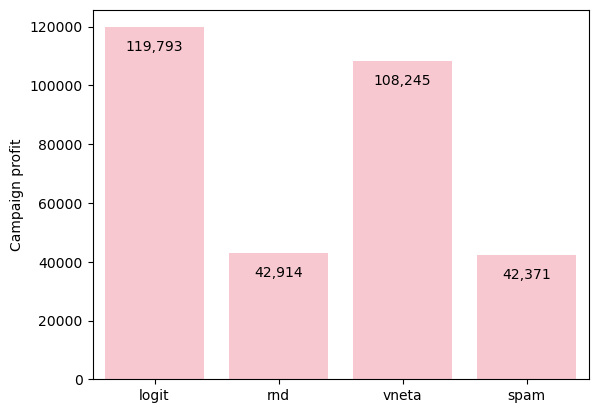

In [ ]:
plt.clf()
fig = sns.barplot(x="name", y="Profit", color="pink", data=performance_data)
fig.set(xlabel="", ylabel="Campaign profit")
for index, row in performance_data.iterrows():
    fig.text(row.name, row.Profit - 8000, f"{int(row.Profit):,}", color="black", ha="center")
plt.show()

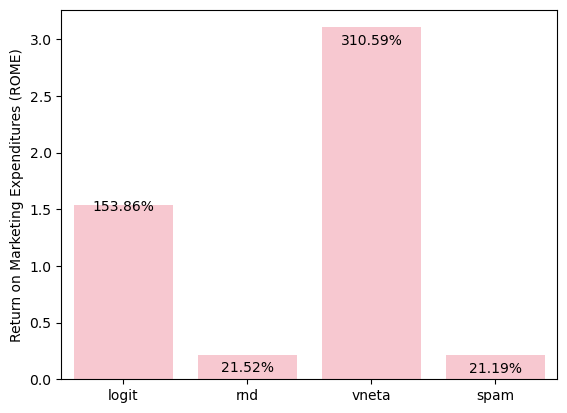

In [ ]:
plt.clf()
fig = sns.barplot(x="name", y="ROME", color="pink", data=performance_data)
fig.set(xlabel="", ylabel="Return on Marketing Expenditures (ROME)")
for index, row in performance_data.iterrows():
    adj = rsm.ifelse(index == 0, 0.05, 0.15)
    fig.text(
        row.name,
        row.ROME - adj,
        f"{round((100*row.ROME), 2):,}%",
        color="black",
        ha="center",d
    )
plt.show()

e. Based on the projected profit numbers from VI.d, discuss which of these 4 approaches you would recommend and why (2 points)

Using predictions from a logistic regression model for ad targeting is the best choice if the goal is maximizing total profit($119K). More scalable than vneta because it uses data without additional consulting costs. Use predictions generated by Vneta for ad targeting is the best choice if the goal is marketing efficiency. Has higher ROME (3.11) compared to logit (1.54). More cost-effective per dollar spent but lower total profit.

f. Calculate the profit and ROME implications for each of the 4 options mentioned in VI.d if TZ purchases exactly 20-million impressions for the upcoming ad campaign out of the +500M prospects that Vneta has access to (2 points)

> Note: Calculate **projected profits from purchasing exactly 20M impressions** under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

> Note: For efficiency, consider adapting the `perf_calc` function you created for the Tuango case to do the relevant performance calculations for the different models.

In [ ]:
# clicks
clicks_spam_20 = total_impressions * ctr_spam
clicks_rnd_20 = total_impressions * ctr_rnd
clicks_logit_20 = total_impressions * ctr_logit
clicks_vneta_20 = total_impressions * ctr_vneta

In [ ]:
# revenue
revenue_spam_20 = clicks_spam_20 * 0.05 * 25
revenue_rnd_20 = clicks_rnd_20 * 0.05 * 25
revenue_logit_20 = clicks_logit_20 * 0.05 * 25
revenue_vneta_20 = clicks_vneta_20 * 0.05 * 25

In [ ]:
# cost
cost_spam_20 = 10 / 1000 * total_impressions
cost_rnd_20 = 10 / 1000 * total_impressions
cost_logit_20 = 10 / 1000 * total_impressions
cost_vneta_20 = 10 / 1000 * total_impressions

In [ ]:
profit_spam_20 = revenue_spam_20 - cost_spam
profit_rnd_20 = revenue_rnd_20 - cost_rnd
profit_logit_20 = revenue_logit_20 - cost_logit
profit_vneta_20 = revenue_vneta_20 - cost_vneta

In [ ]:
rome_spam_20 = profit_spam_20 / cost_spam_20
rome_rnd_20 = profit_rnd_20 / cost_rnd_20
rome_logit_20 = profit_logit_20 / cost_logit_20
rome_vneta_20 = profit_vneta_20 / cost_vneta_20

In [ ]:
mod_perf_20M = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [profit_logit_20, profit_rnd_20, profit_vneta_20, profit_spam_20],
        "ROME": [rome_logit_20, rome_rnd_20, rome_vneta_20, rome_spam_20],
    }
)
mod_perf_20M.sort_values(by="profit", ascending=False)

,model,profit,ROME
2,vneta,786335.257022,3.931676
0,logit,429859.905506,2.149300
1,rnd,43575.659988,0.217878
3,spam,42371.122956,0.211856


In [ ]:
tz_gaming.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,id,pred_logit,pred_rnd,pred_logit_dec,click_numeric,target_logit,target_rnd,target_vneta,pred_spam,target_spam
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,id247135,3.382977e-13,0.009222,10,0.0,False,True,False,1,True
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,id245079,1.156355e-02,0.008751,3,0.0,True,True,False,1,True
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,id927245,2.655311e-03,0.008505,7,0.0,False,True,False,1,True
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,id922188,1.349420e-02,0.009600,3,0.0,True,True,True,1,True
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,id355833,1.868222e-03,0.008704,8,0.0,False,True,False,1,True


g. Based on the results from VI.f, discuss which of the 4 approaches you would recommend to put into production and why. Is your recommendation different from VI.e? Why (not) (2 points)

Based on the results from VI.f, the best-performing approach is Vneta’s proprietary model (pred_vneta), which generates the highest profit ($786K) and the best ROME (3.93). Logistic regression (pred_logit) is a strong alternative, achieving $429K profit with a solid ROME of 2.15. Random (pred_rnd) and spam (spam) perform poorly, with low profits (~$43K) and low ROME (~0.21-0.22), making them inefficient. 


My recommendation is different from VI.e. In VI.e, I recommended pred_vneta but with some concerns due to its lower total profit ($108K). In VI.f, pred_vneta is clearly the best model ($786K profit, 3.93 ROME), making it the best production choice.

In [ ]:
tz_gaming.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,id,pred_logit,pred_rnd,pred_logit_dec,click_numeric,target_logit,target_rnd,target_vneta,pred_spam,target_spam
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,id247135,3.382977e-13,0.009222,10,0.0,False,True,False,1,True
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,id245079,1.156355e-02,0.008751,3,0.0,True,True,False,1,True
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,id927245,2.655311e-03,0.008505,7,0.0,False,True,False,1,True
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,id922188,1.349420e-02,0.009600,3,0.0,True,True,True,1,True
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,id355833,1.868222e-03,0.008704,8,0.0,False,True,False,1,True


In [ ]:
dec_tab = dec_tab[["nr_impressions", "nr_clicks", "ctr"]]
dec_tab = dec_tab.reset_index(drop=True)

## Part VII: Generative AI (5 points)

Please describe how you used Generative AI-tools like ChatGPT to support your work on this assignment and enhance your learning. Create a pdf where you organize your interactions with AI and comment on what things did and did not go well. Bring any questions you may have about the assignment and the support you received from GenAI to class so we can discuss.

Make sure to include:

- Specific examples of prompts you used
- How the AI responses helped or hindered your understanding
- Any limitations or challenges you encountered
- Key insights gained from using GenAI tools
- Questions that arose during your interactions with AI
- How GenAI complemented your learning process

Note: No matter how you used Generative AI-tools, you will be expected to understand and talk meaningfully about the work you submitted for this assignment. You may be called on in class to walk us through your thought process and calculations.

https://chatgpt.com/c/6795793d-bb1c-8013-ae21-58b13fac799f